# **TASK-1 Simple Regression**
- first reading data
- conditioning data using dropna() method
    - removes null ( also NAN values for number types )
- checking data by describe, shape

In [235]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/AI_LAB/housing.csv')

In [236]:
data = data.dropna()

In [237]:
X_HMA = data['housing_median_age'].values
Y = data['median_house_value'].values

In [238]:
pd.DataFrame(Y).describe()

,0
count,20433.000000
mean,206864.413155
std,115435.667099
min,14999.000000
25%,119500.000000
50%,179700.000000
75%,264700.000000
max,500001.000000


## Defining required function for TASK-1 and TASK-2

**compute_cost**
- calculates mean square error

**normalize**
- gives the z-score ie ( normalizes such that mean lies in the y axis and std dev is -1 to 1)

**gradient_descent**
- multipurpose linear regression gradient descent
$$
J_\theta = \frac{1}{2m}||X\theta - y|| \\
\nabla J_\theta = \frac{1}{m}X^T[X\theta - y]\\
\text{so the gradient descent turns out to be}\\
\theta := \theta - \frac{\alpha}{m}X^T[X\theta - y]
$$

In [239]:
import numpy as np

def compute_cost(X, y, theta):
    return np.sum(np.square(np.matmul(X, theta) - y)) / (2 * len(y))

def normalize(X):
    mu = np.mean(X, axis=0)      # mean of each column
    sigma = np.std(X, axis=0)    # std of each column
    X_norm = (X - mu) / sigma
    return X_norm

def gradient_descent(x, y, iterations, alpha, *, theta = None):
    if theta is None:
        theta = np.zeros(x.shape[1])
    # this gives the no of value same as len(x) since it gives row for a np
    m = len(y)
    for i in range(iterations):
        gradient = np.matmul(x.T, np.matmul(x, theta) - y) / m
        # it seems you can alse do this
        # gradient = x.T @ (x @ theta - y) / m theese days
        if np.linalg.norm(gradient) <= 1e-6:
            break
        theta = theta - (alpha * gradient)
    return theta



Text(0, 0.5, 'Median house value')

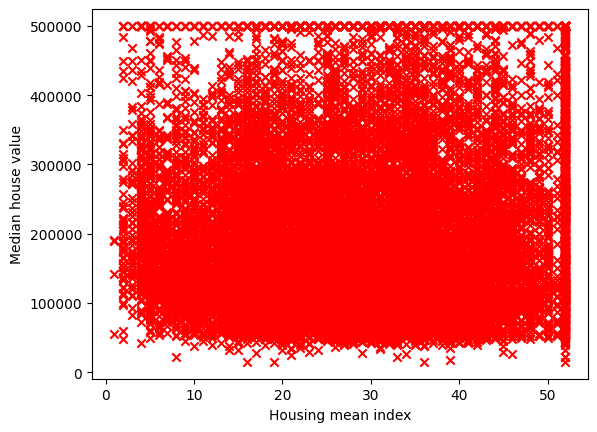

In [240]:
import matplotlib.pyplot as plt

plt.scatter(X_HMA, Y, marker='x', color='red')
plt.xlabel('Housing mean index')
plt.ylabel('Median house value')


In [241]:
theta = np.zeros(2)
X_HMA = normalize(X_HMA)
X = np.column_stack((np.ones(len(X_HMA)), X_HMA))
print("cost: ", compute_cost(X,Y, theta))
alpha = 0.01
iterations = 5000

theta = gradient_descent(X, Y, iterations, alpha)
print("predicted weights: ", theta)
print("cost: ", compute_cost(X,Y, theta))

cost:  28058813258.967407
predicted weights:  [206864.4131542   12285.75368563]
cost:  6586900672.134097


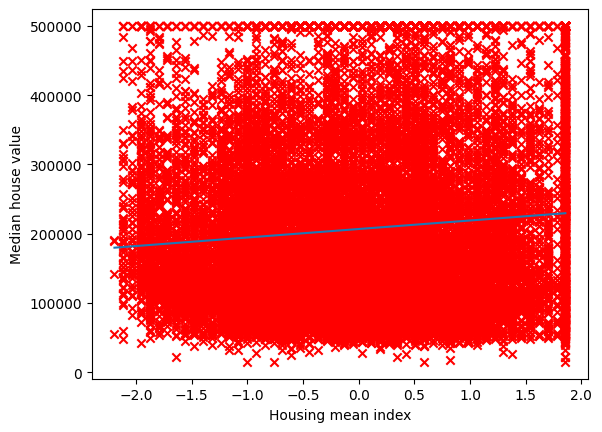

In [242]:
plt.scatter(X_HMA, Y, marker='x', color='red')
plt.xlabel('Housing mean index')
plt.ylabel('Median house value')

samples = np.linspace(min(X_HMA), max(X_HMA))
line = theta[0] + theta[1] * samples
plt.plot(samples, line)

## Intrepretation of Single Value linear regression

> What does the coefficient represent?
> - The Coefficient represents the slope of the line

> What does the intercept mean in this context?
> - The intercept usually is the value when all values are zero and can equal to the mean if the given value is mean centered.


# **Task-2 for multiple Data**
Same as task 1 but we now use multiple data and the same generalized linear regression gradient descent function

In [243]:
X = data[['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']].values
Y = data['median_house_value'].values
X = normalize(X)
X = np.column_stack((np.ones(X.shape[0]), X)) ## here sinc we want the no of rows X.len() works too

alpha = 0.1
iteration = 10000
theta = gradient_descent(X, Y, iteration, alpha)

print("predicted weights: ", theta)

predicted weights:  [206864.41315519  23698.7264617  -43121.11968694  42535.16671936
 -40022.83617367  47710.98946874  90685.86264832]


## **Comparing with the Standard Library values**

In [244]:
# From Standard Library for comparison

# Using library

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Load data
data = pd.read_csv('/content/drive/MyDrive/AI_LAB/housing.csv')
data = data.dropna()
X = data[['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']].values
Y = data['median_house_value'].values

# Feature normalization (standardization)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create linear regression model
model = LinearRegression()
model.fit(X_scaled, Y)

# Get the learned weights and bias
print("Bias (intercept):", model.intercept_)
print("Weights (coefficients):", model.coef_)

# Optional: predict
y_pred = model.predict(X_scaled)
print("prediction:", y_pred)

Bias (intercept): 206864.4131551901
Weights (coefficients): [ 23698.72647253 -43121.11987614  42535.16752797 -40022.83602185
  47710.98870358  90685.86270363]
prediction: [428551.23479638 418546.80669904 393062.53464453 ...  89981.48337943
  98861.64614388 122408.92972646]


## Intrepretation
> What does each coefficient represent?
> - here the coefficent represents the change in y per unit change in the respective x. it is the corelation coefficient.

> How does this model differ from the single-feature model?
> - This differs form single-feature as there are more features with each different impact on the featrure

# **Comparision**

> Which model performs better? Why does using multiple features help or hurt performance?
> - The multi variable model permorms better as it has multiple data some with better corelation some with less and it figures out the overall change in the Y ( output value ) value w.r.t the individual change in all the X( input value)

> Which model is easier to interpret?
> - The single var model is easier to interpret and you can visualize the graph for the model. as it is 2D graph which we have been working with since our childhood, has basic math.
